In [1]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve


from sklearn.naive_bayes import MultinomialNB,CategoricalNB,GaussianNB

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
df=pd.read_csv("prepared_ravdess_features.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [3]:
df_copy=df.copy()

cat_var=["vocal_channel","emotional_intensity","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,0,Dogs are sitting by the door,1,0,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,0,Dogs are sitting by the door,0,0,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,happy,1,Dogs are sitting by the door,1,0,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,0,Kids are talking by the door,0,0,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,1,Dogs are sitting by the door,1,0,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [4]:
# one-hot encoding of categorical feature "emotion"
categorical_col = ["emotion"]

df_copy = pd.get_dummies(df_copy, columns=categorical_col)
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,Dogs are sitting by the door,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,Dogs are sitting by the door,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,Dogs are sitting by the door,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,Kids are talking by the door,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,Dogs are sitting by the door,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [6]:
le=preprocessing.LabelEncoder()
df_copy["statement"]=le.fit_transform(df_copy["statement"])
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


Funzioni utili per le analisi e la classificazione

In [7]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [8]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    #print(roc_auc_score(y_test, y_tmp[:,0]))
    print(roc_auc_score(y_test, y_tmp[:,1]))

In [9]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [10]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()  

In [11]:
df_copy["statement"].value_counts()

1    1216
0    1201
Name: statement, dtype: int64

In [12]:
col=[x for x in df_copy.columns if x!="statement"]
X=df_copy[col].values
y = np.array(df_copy["statement"])


#holdout -> statement bilanciato quindi no stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [13]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62       356
           1       0.61      0.44      0.51       370

    accuracy                           0.57       726
   macro avg       0.58      0.57      0.56       726
weighted avg       0.58      0.57      0.56       726



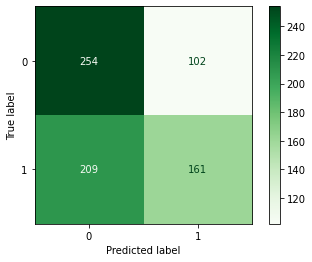

In [15]:
print_confMatrix(y_test,y_pred)

In [16]:
cf = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=[1,0])

In [17]:
# TP, FN, FP, TN
cf[0][0], cf[0][1], cf[1][0], cf[1][1]

(161, 209, 102, 254)

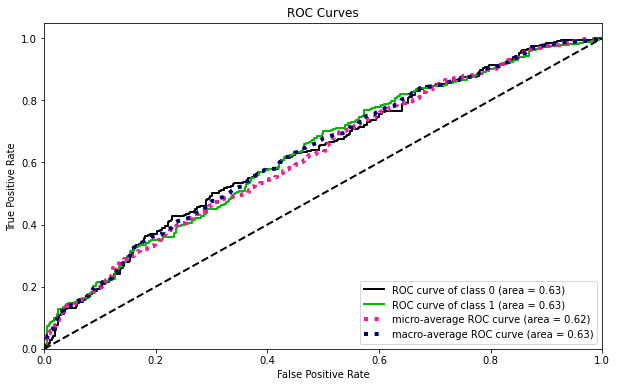

0.6302991193440632


In [18]:
print_rocCurve(clf,X_test,y_test)

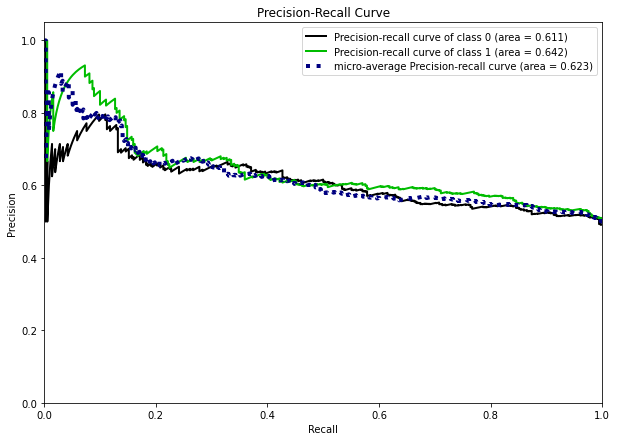

In [19]:
print_precrecCurve(clf,X_test,y_test)

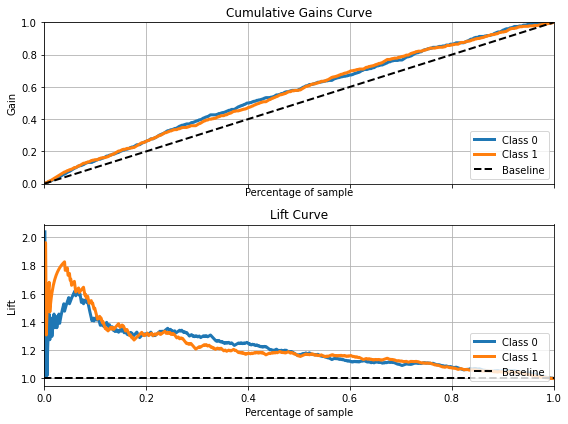

In [20]:
cumulativeGain_AND_Lift_Curve(clf,X_test,y_test)